## SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, Y_train, Y_test = load('../../preprocessing/classification_data.joblib')

In [3]:
from sklearn.preprocessing import StandardScaler
feature_names = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [4]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.766553,0.003691,-0.002255,0.645671,-0.909126,0.647802,-1.037226,0.410519,-0.711288,0.699414,-1.004544,1.718607,-0.569344,1.103459,-1.103459,-0.579608,1.729591,-0.573860,-0.577761
1,-0.143445,0.098180,1.378460,1.246721,-0.909126,0.647802,0.964110,0.432764,-0.000379,0.240998,-1.004544,1.718607,-0.569344,-0.906241,0.906241,-0.579608,-0.578171,1.742584,-0.577761
2,1.573141,1.043070,1.033281,0.347104,-0.909126,-1.543681,-1.037226,-1.353484,1.421438,0.166065,-1.004544,1.718607,-0.569344,1.103459,-1.103459,-0.579608,-0.578171,1.742584,-0.577761
3,-0.815602,-1.508133,-1.037792,0.807043,-0.909126,-1.543681,0.964110,-0.579393,0.710529,0.104355,-1.004544,-0.581867,1.756408,-0.906241,0.906241,-0.579608,1.729591,-0.573860,-0.577761
4,-0.174467,1.232048,-1.382971,-1.226168,0.816189,0.647802,0.964110,1.328333,0.710529,1.426708,-1.004544,-0.581867,1.756408,-0.906241,0.906241,-0.579608,-0.578171,1.742584,-0.577761


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [6]:
params = [
            {
                'kernel': ['linear'],
                'C': [0.01, 0.1, 1, 10],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10],
            },
         ]

In [7]:
gs = GridSearchCV(SVC(class_weight={1:2,0:1}), params, scoring='f1', cv=5, verbose=5)

In [98]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.414 total time=   0.6s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.452 total time=   0.5s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.462 total time=   0.5s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.454 total time=   0.5s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.483 total time=   0.5s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.420 total time=   0.7s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.452 total time=   0.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.476 total time=   0.6s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.462 total time=   0.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.496 total time=   0.6s
[CV 1/5] END ................C=1, kernel=linear;, score=0.417 total time=   1.2s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(class_weight={0: 1, 1: 2}),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='f1', verbose=5)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print("---------------------------------------------------------------------------------")
    print('F1 score: ', f1_score(y, y_pred))
    print('Accuracy score: ', accuracy_score(y, y_pred))

In [17]:
report(gs.best_estimator_, X_test, Y_test)

Classification report for model SVC on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1991
           1       0.64      0.56      0.60       509

    accuracy                           0.85      2500
   macro avg       0.77      0.74      0.75      2500
weighted avg       0.84      0.85      0.84      2500

---------------------------------------------------------------------------------
Confusion matrix for model SVC on training data 
---------------------------------------------------------------------------------
      B    M
B  1831  160
M   222  287
---------------------------------------------------------------------------------
F1 score:  0.600418410041841
Accuracy score:  0.8472


In [25]:
gs.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

## HistGradientBoostingClassifier

In [127]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [1, 2, 4],
    'l2_regularization': [0.0, 0.1, 0.2],
    'max_bins': [50, 100, 255]
}

hgb_grid = RandomizedSearchCV(HistGradientBoostingClassifier(class_weight={1:2, 0:1}),param_grid, cv = 4, n_jobs = -1, scoring='f1')
hgb_grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=4,
                   estimator=HistGradientBoostingClassifier(class_weight={0: 1,
                                                                          1: 2}),
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_bins': [50, 100, 255],
                                        'max_depth': [3, 4, 5],
                                        'max_iter': [100, 200, 300],
                                        'max_leaf_nodes': [15, 31, 63],
                                        'min_samples_leaf': [1, 2, 4]},
                   scoring='f1')

In [128]:
report(hgb_grid.best_estimator_, X_test, Y_test)

Classification report for model HistGradientBoostingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1991
           1       0.63      0.62      0.63       509

    accuracy                           0.85      2500
   macro avg       0.77      0.76      0.77      2500
weighted avg       0.85      0.85      0.85      2500

---------------------------------------------------------------------------------
Confusion matrix for model HistGradientBoostingClassifier on training data 
---------------------------------------------------------------------------------
      B    M
B  1809  182
M   194  315
---------------------------------------------------------------------------------
F1 score:  0.6262425447316103
Accuracy score:  0.8496


Pokusacemo da odradimo resampling i da ponovo pokrenemo algoritam.

In [129]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10, random_state=42)

X_resampled, y_resampled = resample(smote, X_train, Y_train)

Number of instances before resampling with SMOTE : dict_items([(0, 5971), (1, 1529)]). 
Number of instances after  resampling with SMOTE : dict_items([(0, 5971), (1, 5971)]). 


In [130]:
hgb_grid_resampled = RandomizedSearchCV(HistGradientBoostingClassifier(),param_grid, cv = 4, n_jobs = -1, scoring='f1')
hgb_grid_resampled.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=4, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_bins': [50, 100, 255],
                                        'max_depth': [3, 4, 5],
                                        'max_iter': [100, 200, 300],
                                        'max_leaf_nodes': [15, 31, 63],
                                        'min_samples_leaf': [1, 2, 4]},
                   scoring='f1')

In [131]:
report(hgb_grid_resampled.best_estimator_, X_test, Y_test)

Classification report for model HistGradientBoostingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1991
           1       0.62      0.66      0.64       509

    accuracy                           0.85      2500
   macro avg       0.77      0.78      0.77      2500
weighted avg       0.85      0.85      0.85      2500

---------------------------------------------------------------------------------
Confusion matrix for model HistGradientBoostingClassifier on training data 
---------------------------------------------------------------------------------
      B    M
B  1788  203
M   173  336
---------------------------------------------------------------------------------
F1 score:  0.6412213740458015
Accuracy score:  0.8496


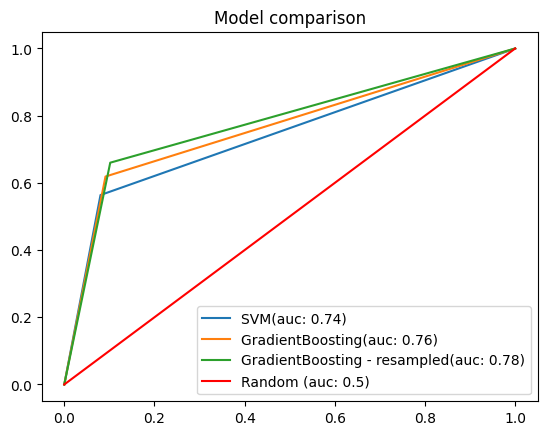

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [gs.best_estimator_, hgb_grid.best_estimator_, hgb_grid_resampled.best_estimator_]
model_names = ['SVM', 'GradientBoosting',  'GradientBoosting - resampled']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

Mozemo primetiti da nam je balansiranje klasa SMOTE tehnikom doprinelo kvalitetu modela.